In [239]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [240]:
df = pd.read_csv("FinalData.csv")
df =df.drop(columns="Unnamed: 0")
df

,Gender,Marital Status,Family members,Status of education,Self_Employed,Income of applicant,Income of coapplicant,LoanAmount applied for (in thoudands),Loan_Amount_Duration,Credit_History,Property_Area,Loan_Status
0,Female,Yes,0,Graduate,Yes,2150,2674,110.0,360.0,1,Rural,Y
1,Male,Yes,0,Graduate,No,2797,1713,121.0,360.0,0,Semiurban,N
2,Male,Yes,0,Graduate,No,3123,1773,151.0,360.0,1,Urban,N
3,Male,Yes,2,Graduate,No,2295,3,182.0,360.0,1,Rural,Y
4,Male,Yes,0,Graduate,No,3344,1917,120.0,360.0,1,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
601,Male,Yes,0,Graduate,No,2322,1106,138.0,360.0,1,Rural,Y
602,Male,No,0,Graduate,No,3066,0,105.0,360.0,1,Semiurban,Y
603,Male,No,0,Not Graduate,No,4783,2534,111.0,360.0,1,Semiurban,Y
604,Male,No,0,Graduate,No,2909,1633,113.0,360.0,1,Semiurban,Y


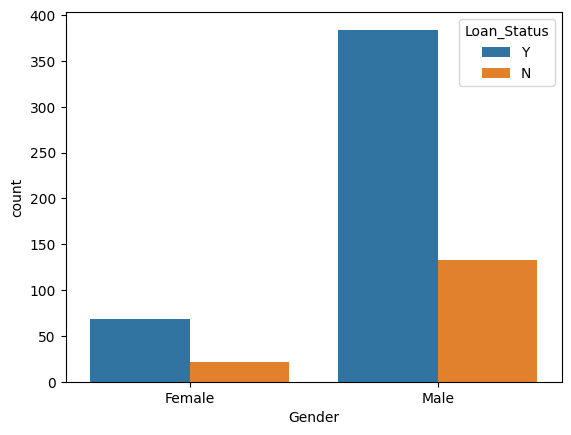

In [241]:
sns.countplot(x="Gender", hue = "Loan_Status" , data = df)
plt.show()

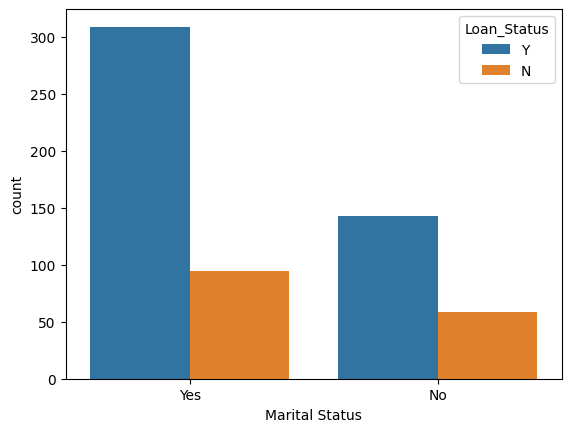

In [242]:
sns.countplot(x="Marital Status", hue = "Loan_Status" , data = df)
plt.show()

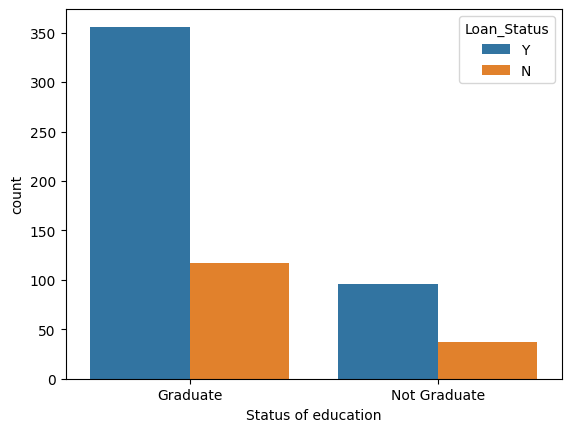

In [243]:
sns.countplot(x="Status of education", hue = "Loan_Status" , data = df)
plt.show()

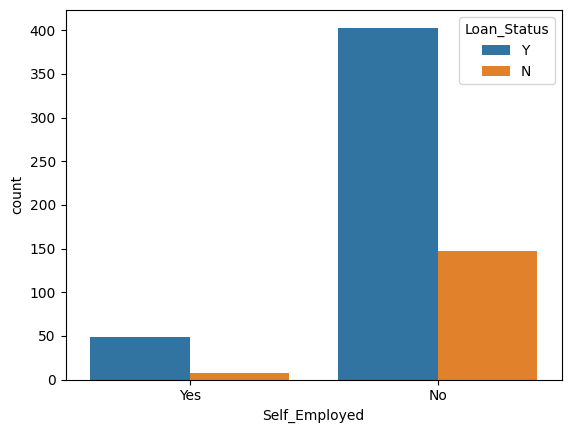

In [244]:
sns.countplot(x="Self_Employed", hue = "Loan_Status" , data = df)
plt.show()

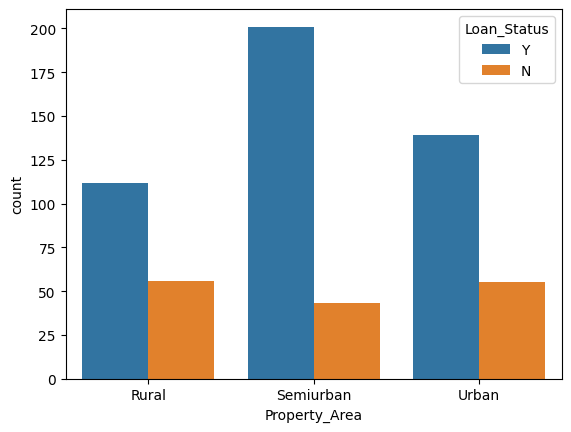

In [245]:
sns.countplot(x="Property_Area", hue = "Loan_Status" , data = df)
plt.show()

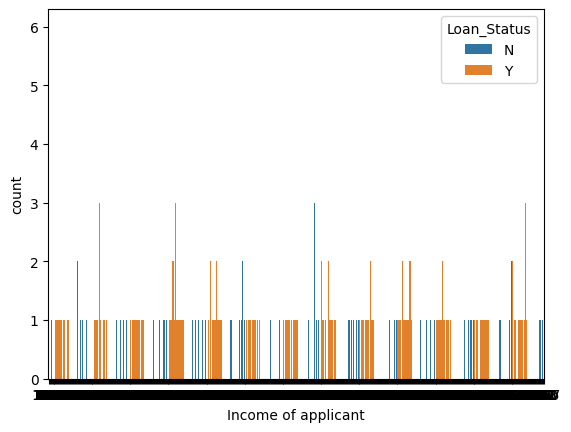

In [246]:
sns.countplot(x="Income of applicant" , hue = "Loan_Status" , data = df )
plt.show()

<Axes: xlabel='Income of coapplicant', ylabel='count'>

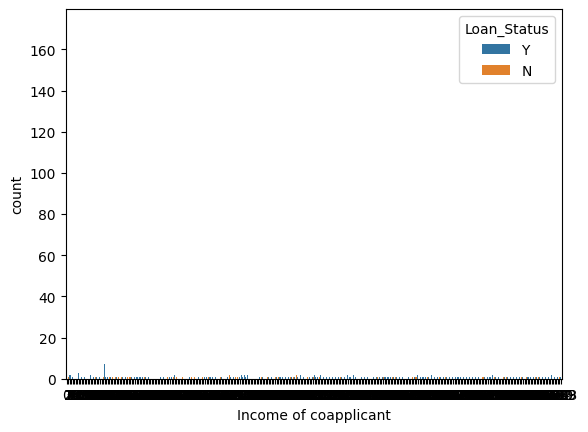

In [247]:
sns.countplot(hue="Loan_Status" , x = "Income of coapplicant" , data = df)

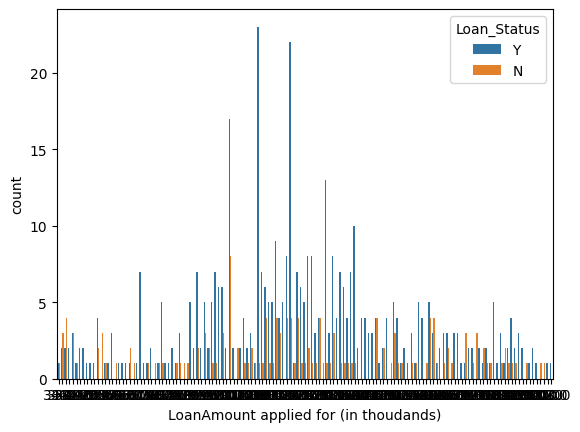

In [248]:
sns.countplot(hue="Loan_Status" , x = "LoanAmount applied for (in thoudands)" , data = df)
plt.show()

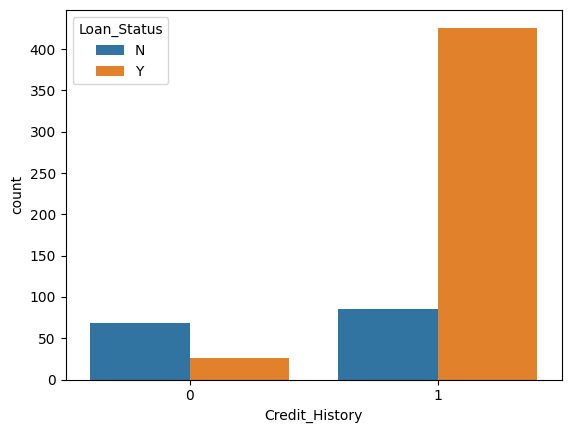

In [249]:
sns.countplot(hue="Loan_Status" , x = "Credit_History" , data = df)
plt.show()

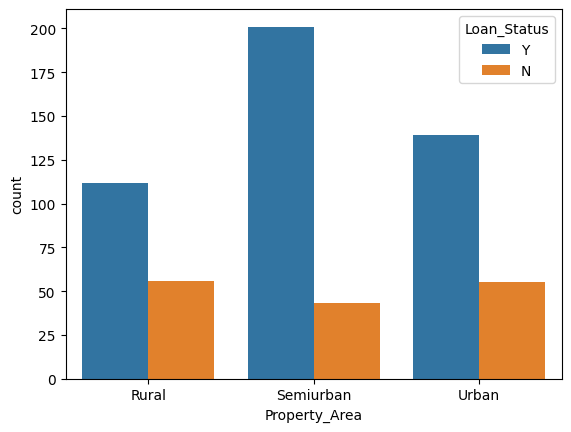

In [250]:
sns.countplot(hue="Loan_Status" , x = "Property_Area" , data = df)
plt.show()

In [251]:
### Encoding All categorical columns into numericals columns

Encoder = LabelEncoder()

df["Gender"]= Encoder.fit_transform(df["Gender"])
df["Marital Status"] = Encoder.fit_transform(df["Marital Status"])
df["Status of education"]= Encoder.fit_transform(df["Status of education"])
df["Self_Employed"] = Encoder.fit_transform(df["Self_Employed"])
df["Property_Area"]= Encoder.fit_transform(df["Property_Area"])

df

,Gender,Marital Status,Family members,Status of education,Self_Employed,Income of applicant,Income of coapplicant,LoanAmount applied for (in thoudands),Loan_Amount_Duration,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,2150,2674,110.0,360.0,1,0,Y
1,1,1,0,0,0,2797,1713,121.0,360.0,0,1,N
2,1,1,0,0,0,3123,1773,151.0,360.0,1,2,N
3,1,1,2,0,0,2295,3,182.0,360.0,1,0,Y
4,1,1,0,0,0,3344,1917,120.0,360.0,1,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
601,1,1,0,0,0,2322,1106,138.0,360.0,1,0,Y
602,1,0,0,0,0,3066,0,105.0,360.0,1,1,Y
603,1,0,0,1,0,4783,2534,111.0,360.0,1,1,Y
604,1,0,0,0,0,2909,1633,113.0,360.0,1,1,Y


#### Applied SVC Model

In [252]:
x = df.drop(["Loan_Status","Gender"] , axis=1)
y = df["Loan_Status"]


In [253]:
## Converting Data into train_test_split


x_train,x_test , y_train,y_test = train_test_split(x,y , test_size=0.2, random_state=2)

In [254]:
## Selecting SVM Model

model = SVC()

In [255]:
model.fit(x_train , y_train)

SVC()

In [256]:
## take a Y-predict from the Model

Y_predict = model.predict(x_test)

In [257]:
## Checking Accouracy score of the Model

Score = accuracy_score(Y_predict, y_test)
Score

0.8278688524590164

#### Accuracy Score of SVM Model = 82% 